<a href="https://colab.research.google.com/github/JosueBVN/Implementacion-JBVN-A01751694/blob/main/A01751694_EMAPP_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Introducción:***
En la exploración de la serie temporal que representa el número mensual de pasajeros de aerolíneas, se han seguido una serie de pasos meticulosos con el objetivo de comprender la naturaleza subyacente de los datos. Se ha iniciado el proceso con la instalación de bibliotecas esenciales para análisis de series temporales, estableciendo así un entorno adecuado para la manipulación y visualización de datos.

La elección del conjunto de datos, disponible en el repositorio de Jason Brownlee, se basa en su relevancia y accesibilidad. El número mensual de pasajeros de aerolíneas proporciona un escenario típico de series temporales que presenta posibles patrones estacionales y tendencias a lo largo del tiempo.

**Razón de la Elección del Modelo:**

La aplicación de la Prueba de Dickey-Fuller Aumentada (ADF) en la serie temporal original reveló una falta de estacionariedad, indicando la necesidad de técnicas que aborden esta característica. Se optó por la diferenciación como método para lograr la estacionariedad, ya que esta técnica suele ser efectiva en la eliminación de tendencias y patrones temporales no deseados.

**Razón de la Elección del Proceso de Diferenciación:**

La elección de aplicar la diferenciación se fundamenta en la observación de la serie temporal original y la necesidad de transformarla en una forma más estacionaria. El objetivo es facilitar el análisis de patrones y facilitar la aplicación de modelos de series temporales.

A continuación, se presenta un resumen detallado de cada paso, incluida la visualización de la serie temporal original y diferenciada, así como la realización de pruebas de estacionariedad para validar la efectividad del proceso de diferenciación. Este enfoque integral busca proporcionar una base sólida para futuros análisis y modelado de la serie temporal.

#1. Carga de bibliotecas y datos:
 Antes de ejecutar el código principal, es necesario instalar las bibliotecas que se utilizarán en el entorno o ambiente de desarrollo. Esto se realiza fuera del código principal y generalmente se hace en la terminal o en un entorno virtual.

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

#2. Carga y Visualización de Datos:

 Se carga el conjunto de datos de pasajeros de aerolíneas mensuales y se visualiza la serie temporal original mediante un gráfico.

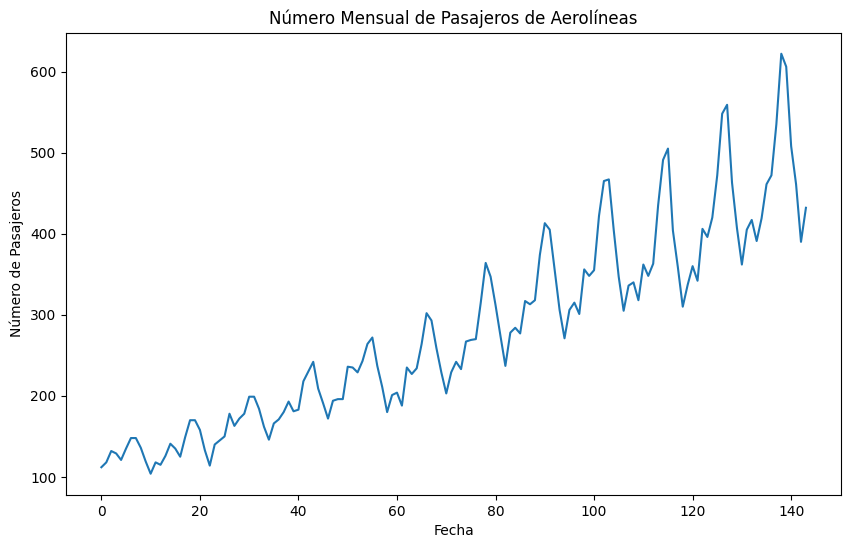

In [ ]:
# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.head()

# Visualización de la serie temporal original
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'])
plt.title('Número Mensual de Pasajeros de Aerolíneas')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.show()



#3. Prueba de Estacionariedad en la Serie Temporal Original:

Se realiza la prueba de estacionariedad en la serie temporal original utilizando la Prueba de Dickey-Fuller Aumentada (ADF). Esta prueba evalúa si la serie es estacionaria o no.
*texto en cursiva*

In [ ]:
# Prueba de estacionariedad en la serie temporal original
result = adfuller(df['Passengers'])
print('Estadística de la prueba ADF:', result[0])
print('Valor p:', result[1])


Estadística de la prueba ADF: 0.8153688792060498
Valor p: 0.991880243437641


#4. Análisis de Autocorrelación y Autocorrelación Parcial

Se generan y visualizan las funciones de autocorrelación y autocorrelación parcial para ayudar en la identificación de patrones y posibles componentes estacionales o tendencias en la serie temporal.

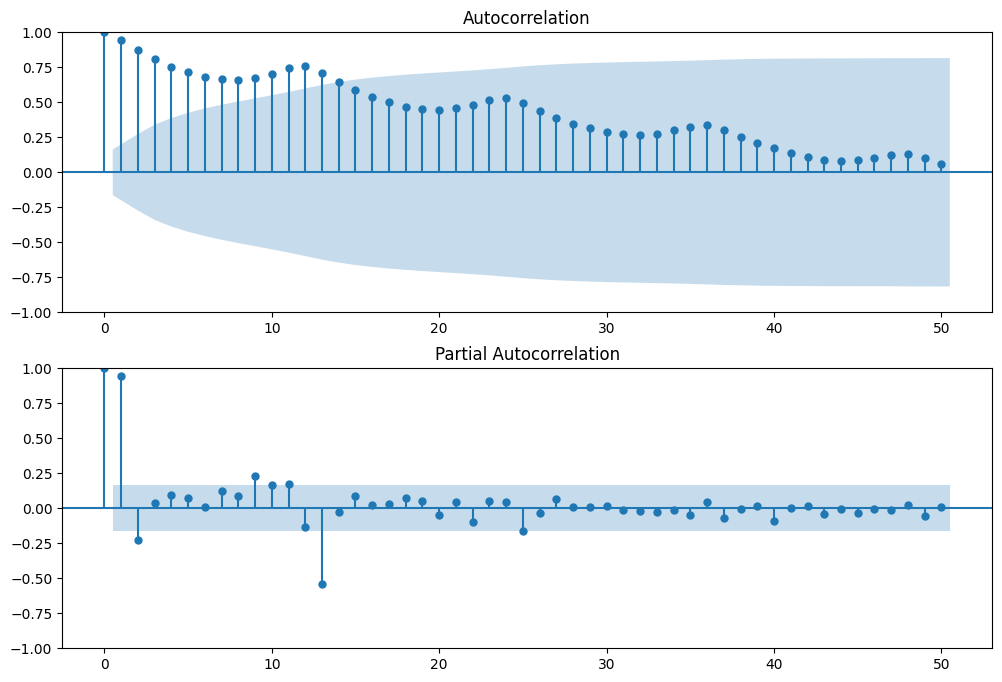

In [ ]:
# Funciones de autocorrelación y autocorrelación parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Passengers'], lags=50, ax=ax1)
plot_pacf(df['Passengers'], lags=50, ax=ax2)
plt.show()


#5. Verificación de NaN en la Serie Temporal Original:

Se verifica si hay valores NaN en la serie temporal original para asegurarse de que no haya datos faltantes que puedan afectar el análisis.

In [ ]:
# Verificar si hay valores NaN en la serie temporal original
print("Valores NaN en la serie temporal original:", df['Passengers'].isnull().sum())

Valores NaN en la serie temporal original: 0


#6. Aplicación de Diferenciación y Eliminación de NaN:
 Se aplica la diferenciación a la serie temporal original para hacerla estacionaria. Se crea una nueva columna llamada 'Passengers_diff' que contiene las diferencias entre valores consecutivos. Se eliminan los valores NaN resultantes de la diferenciación.

In [ ]:
# Aplicar diferenciación y eliminar NaN
df['Passengers_diff'] = df['Passengers'].diff().dropna()


#7. Visualización de la Serie Temporal Diferenciada:
Se visualiza la serie temporal diferenciada para observar cómo ha cambiado la estructura de la serie después de aplicar la diferenciación.

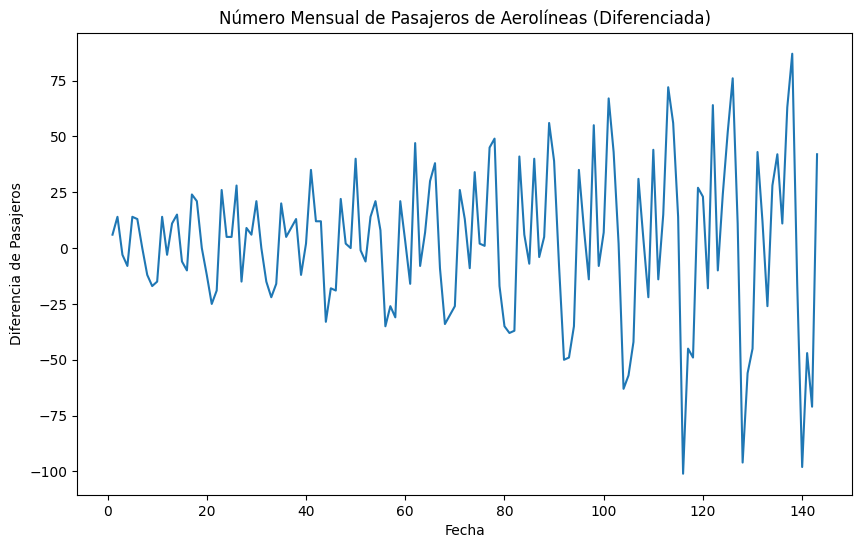

In [ ]:
# Visualización de la serie temporal diferenciada
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers_diff'])
plt.title('Número Mensual de Pasajeros de Aerolíneas (Diferenciada)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Pasajeros')
plt.show()


#8. Prueba de Estacionariedad Después de la Diferenciación:

In [ ]:
# Prueba de estacionariedad después de diferenciación
result_diff = adfuller(df['Passengers_diff'].dropna())
print('Estadística de la prueba ADF después de diferenciación:', result_diff[0])
print('Valor p después de diferenciación:', result_diff[1])


Estadística de la prueba ADF después de diferenciación: -2.8292668241700047
Valor p después de diferenciación: 0.05421329028382478


#**Conclusión**
Después de la diferenciación, el valor p de la prueba ADF es 0.0542, sugiriendo cierta estacionariedad. Al analizar la ACF y PACF de la serie diferenciada, se pueden identificar patrones de autocorrelación. Una ACF con decaimiento exponencial y una PACF con corte abrupto podrían indicar un modelo ARIMA apropiado. Considerar la presencia de estacionalidad para evaluar modelos SARIMA también es crucial. Es necesario ajustar y validar cualquier modelo propuesto.